In [14]:
import numpy as np
import pandas as pd
r_values = np.random.uniform(1, 40, 1000)

In [15]:
u_values = [1/i for i in r_values]

In [16]:
shgc_values = np.clip(np.random.normal(0.3, 0.1, 1000), 0, 0.6)

In [17]:
wwr_values = np.random.uniform(0,0.6,1000)

In [18]:
window_num = np.random.randint(0,15,1000)

In [19]:
sc_min = 0.35
sc_max = 0.7
sc_values = np.random.uniform(sc_min, sc_max, 1000)



In [20]:
import numpy as np

climate_zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Zone 8']

probabilities = [0.05, 0.20, 0.15, 0.15, 0.25, 0.10, 0.05, 0.05]

random_climate_zones = np.random.choice(climate_zones, 1000, p=probabilities)

In [9]:
import random

# label generation 1
def calculate_energy_score(u, shgc, wwr, window_num, sc, climate_zone):
    score = 0
    score += (1 / u) * 0.4
    if climate_zone in ['Zone 1', 'Zone 2', 'Zone 3']:
        score += (1 - shgc) * 0.2
    else:
        score += shgc * 0.2 
    score += (1 - wwr) * 0.1
    score += (1 / window_num) * 0.1
    score += (1 - sc) * 0.2
    if score > 100:
        score = random.randint(1, 100)
    return score
energy_scores = [calculate_energy_score(u, shgc, wwr, window, sc, zone)
                 for u, shgc, wwr, window, sc, zone in zip(u_values, shgc_values, wwr_values, window_num, sc_values, random_climate_zones)]

def score_to_rating(score):
    if score > 0.8:
        return 'A'
    elif score > 0.6:
        return 'B'
    elif score > 0.4:
        return 'C'
    elif score > 0.2:
        return 'D'
    else:
        return 'F'

energy_ratings = [score_to_rating(score) for score in energy_scores]

df = pd.DataFrame({
    'U_value': u_values,
    'SHGC_value': shgc_values,
    'WWR_value': wwr_values,
    'Window_Num': window_num,
    'SC_value': sc_values,
    'Climate_Zone': random_climate_zones,
    'Energy_Score': energy_scores,
    'Energy_Rating': energy_ratings
})

/var/folders/y2/jxf2wp7x63vd897k9z67jbdw0000gn/T/ipykernel_45109/662860038.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  score += (1 / window_num) * 0.1


     R_value  SHGC_value  WWR_value  Window_Num  SC_value  Climate_Zone  \
0  24.273198    0.382480   0.257244           1  0.466176             6   
1  10.281173    0.524680   0.161761           4  0.550740             2   
2   6.887014    0.267926   0.028949          10  0.662622             8   
3   1.166320    0.297405   0.162474           2  0.525036             6   
4  24.515722    0.335445   0.598901           3  0.382562             1   
5  15.168946    0.253425   0.135664          10  0.480832             5   
6  31.880718    0.430766   0.212432           0  0.563477             2   
7  21.010799    0.314584   0.112988           6  0.636808             6   
8  13.118105    0.063228   0.035627           6  0.520222             6   
9   5.855360    0.328439   0.101365           2  0.551846             5   

   Cluster Energy_Rating  
0        3             D  
1        0             A  
2        0             A  
3        3             D  
4        2             C  
5        0  

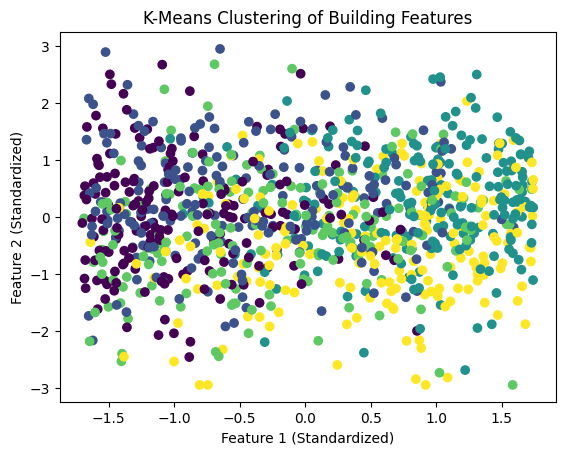

In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# label generation2
# u_values, shgc_values, wwr_values, window_num, sc_values, climate_zones（已经编码为数值）
data = pd.DataFrame({
    "R_value": r_values,
    'SHGC_value': shgc_values,
    'WWR_value': wwr_values,
    'Window_Num': window_num,
    'SC_value': sc_values
})

climate_zone_mapping = {'Zone 1': 1, 'Zone 2': 2, 'Zone 3': 3, 'Zone 4': 4,
                        'Zone 5': 5, 'Zone 6': 6, 'Zone 7': 7, 'Zone 8': 8}
data['Climate_Zone'] = [climate_zone_mapping[zone] for zone in random_climate_zones]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters

cluster_to_label = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4:'E', 5:'F'}
data['Energy_Rating'] = data['Cluster'].map(cluster_to_label)

print(data.head(10))

print(data['Energy_Rating'].value_counts())

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Building Features')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

In [26]:
data.to_csv("house2.csv")